# Analysis of  Stack Over Flow 2020 Survey Results 


In this notebook, i will analyze the Stack Over Flow 2020 Survey Data.<br>
I want to understand the factors effecting job satisfaction in different countries.<br>
And as new starter on learning programing language, Python, i want to undestand the <br>
popularity of the languages in different countries.<br>
For this purpose i will try to asnwer below questions:

1. How is the distribution of the respondents according to countries, does the distribution represents<br> 
the countries well according to their population ?
2. What are the most popular (currently being worked and desired to work next year) programing languages<br>
in mostly represented countries ?
3. How is the distribution of the job satisfaction in different countries?<br>

4. What are the most effected features on job satistaction ?

### Index

[i. Importing Required Packages](#i)<br>
[ii. Importing Data](#ii)<br>

[Q1 : How is the distribution of the respondents according to countries, does the distribution represents the countries well according to their population ?](#Q1)<br>
* [Q1.1 : What is the percentage of Respondents according to Countries?](#Q1.1)<br>
* [Q1.2 : What is Respondent Density According to Population?](#Q1.2)<br>

[Q2. What are the most popular (currently being worked and desired to work next year) programing languages in mostly represented countries ?](#Q2)<br>
* [Q2.1: What is the most popular language among the respondents ?](#Q2.1)<br>
* [Q2.2 What are the usage percents of languages in Countries, Which language is being used most in which Country?](#Q2.2)<br>
* [Q2.3: What is the most desired language next year ?](#Q2.3)<br>
* [Q2.4 What are the desired percents of languages in Countries, Which language is desired most in which country?](#Q2.4)<br>

[Q3: How is the distribution of following features in those countries ? (Primary field of study, Education Level, Job satisfaction, Employment and Job seeking status, Education importance)](#Q3)<br>
* [Q3.1 How is the distribution of the primary fields in top countries?](#Q3.1)<br>
* [Q3.2 How is the distribution of the education level in top countries?](#Q3.2)<br>
* [Q3.3 How is the distribution of the job satisfaction in top countries?](#Q3.3)<br>

[Q4: 4.What are the most effected features on job satistaction ?](#Q4)<br>


[Conclusion](#5)<br>





<a id="i"></a>
### i. Importing Required Packages 

In [292]:
# Importing required packages

import numpy as np
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ingore warnings
import warnings
warnings.filterwarnings("ignore")

<a id="ii"></a>
## ii. Importing Data

I donwloaded the Stack Over Flow 2020 survey data using this [link].<br>
For the Population 2020 data, i downloaded the data from [kaggle], thanks to Tanu N Prabhu.





[link]: http://insights.stackoverflow.com/survey/ 
[kaggle]:https://www.kaggle.com/tanuprabhu/population-by-country-2020


In [232]:
# Reading datas from csv files

# Read Stack Over Flow Survey Results
results_2020 = pd.read_csv(r"C:\Users\oozturk8\Desktop\data\survey_results_public_2020.csv")

# Read Stack Over Flow Survey Questions
schema_2020 = pd.read_csv(r"C:\Users\oozturk8\Desktop\data\survey_results_schema_2020.csv")

# Read World Population Data 
population_2020 = pd.read_csv(r"C:\Users\oozturk8\Desktop\data\population_by_country_2020.csv")


<a id="Q1"></a>
## Q1 : How is the distribution of the respondents according to countries, does the distribution represents the countries well according to their population ?

I will start looking at first rows of datas to understand how they are look like:

In [233]:
# Looking at first 3 rows:
results_2020.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


<a id="Q1.1"></a>
### Q1.1 : What is the percentage of Respondents according to Countries?

#### Business Understanding:
Knowing the individuals distribution in each country is a must to gain consistent insights with further analysis.<br>
If there is not sufficient respondent for a country in survey, this means that the country is not well represented.<br>
Thus, i need to understand percentage of respondents according to countries.

#### Data Understanding

I will use "Country" column in order to find the number of the respondent from each country.<br>
Afterwards i will divide the sum of respondents by total number of respondents to get the mean.<br>
First: I will check if there is any NaN row in Country column:

In [234]:
# How many respondents having NaN for Country?
country_nan_count = results_2020.Country.isnull().sum()
print("Survey respondents not having any country: ", country_nan_count)

Survey respondents not having any country:  389


In [235]:
# Check if the respondents who have NaN for "Country" have any NaN for the rest of the columns
not_na_percents = results_2020[results_2020.Country.isnull()==True].notnull().mean()
print("Not-NaN Percent > 0 :\n" ,not_na_percents[not_na_percents>0])

Not-NaN Percent > 0 :
 Respondent    1.000000
MainBranch    0.843188
Hobbyist      0.884319
Employment    0.457584
dtype: float64


In [236]:
# Drop NaN rows and create new data frame
df = results_2020.dropna(subset = ["Country"], axis = 0)

I will create a function to calculate percentage of respondents according to countries:

In [237]:
def create_count_table(df, col_name):
    '''
    INPUTS:
    df - (dataframe)- The dataframe containing related column
    col_name (string)- Column name of the column of which values to be counted
    
    OUTPUT:
    new dataframe containing columns:
    - col_name:  
    - Counts : Counts of items in target column
    - Percent : Counts of item / Total count of column
    
    '''
    counts = df[col_name].value_counts().values
    items = df[col_name].value_counts().index
    percent = np.round(counts / counts.sum()*100,2)
    
    new_table = pd.DataFrame({col_name:items, "Counts":counts, "Percent":percent})
    
    return new_table

In [238]:
# Creating a dataframe including countries, counts and percent.
country_count = create_count_table(df, "Country")
country_count.head()

,Country,Counts,Percent
0,United States,12469,19.46
1,India,8403,13.11
2,United Kingdom,3896,6.08
3,Germany,3890,6.07
4,Canada,2191,3.42


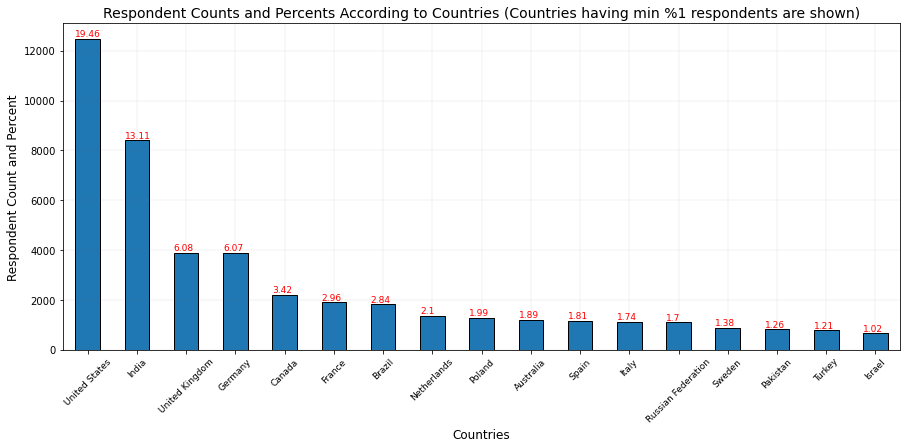

In [239]:
# Visualisation - Creating Bar Plot

# Filter the data as to have countries percent > 1
country_count_filtered = country_count[country_count.Percent>1]

# Creating ax object
ax = country_count_filtered.plot(kind = "bar", x = "Country", y = "Counts",legend = False, figsize = (15,6), edgecolor = "black")

# Showing percentages over the bar
i=0
for patch in ax.patches:
    ax.text((patch.get_x()),
            patch.get_height()+100,
            country_count_filtered.Percent.values[i],
            fontsize=9,
            rotation=0,
            color="red")
    i = i + 1

# Plotting
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Respondent Count and Percent", fontsize = 12)
plt.title("Respondent Counts and Percents According to Countries (Countries having min %1 respondents are shown)", 
          fontsize=14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.xticks(rotation = 45, fontsize = 9)
plt.show()

From above graph: Most interested Country in the survey is United States with a 19.46 % .<br>
And it is followed by India, United Kingdom and Germany.

<a id="Q1.2"></a>
### Q1.2 : What is Respondent Density According to Population?

#### Business Understanding:

* We see that top 5 countries according to respondent percent are US, India, UK, Germany and Canada.<br>
* I want to understand how is the distribution according to country population.<br>
* Thus i will compare the Respondent Density of each country:

     Respondent Density = Respondent number in country / Population of Country <br>

#### Data Understanding:
* I will use Population data to get the population values corresponding Countries:

In [240]:
# Creating new data frame with necessary columns from population_2020 dataframe

pop_df = population_2020[["Country (or dependency)","Population (2020)"]]
pop_df.rename(columns={"Country (or dependency)": "Country", "Population (2020)": "Population"}, inplace = True)

pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     235 non-null    object
 1   Population  235 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [241]:
# Checking the Country names if there are differences between pop_df and country_count df

# Existing countries in country_count but not existing pop_df
non_matches = sorted(set.difference(set(country_count.Country),set(pop_df.Country)))
non_matches

['Brunei Darussalam',
 'Cape Verde',
 'Congo, Republic of the...',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Hong Kong (S.A.R.)',
 'Kosovo',
 "Lao People's Democratic Republic",
 'Libyan Arab Jamahiriya',
 'Micronesia, Federated States of...',
 'Nomadic',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Saint Vincent and the Grenadines',
 'Swaziland',
 'Syrian Arab Republic',
 'The former Yugoslav Republic of Macedonia',
 'United Republic of Tanzania',
 'Venezuela, Bolivarian Republic of...',
 'Viet Nam']

In [242]:
# Manuel correction of above non-matches in pop_df

# correcting_list = ["country name in country_count", "country name in pop_df"]
correcting_list = [['Brunei Darussalam','Brunei'],['Cape Verde',  'Cabo Verde'],['Congo, Republic of the...',  'Congo'],
                   ['Czech Republic', 'Czech Republic (Czechia)'],['Democratic Republic of the Congo', 'DR Congo'],
                   ['Hong Kong (S.A.R.)', 'Hong Kong'],['Kosovo', "Kosovo"],["Lao People's Democratic Republic",'Laos'],
                   ['Libyan Arab Jamahiriya','Libya'],['Micronesia, Federated States of...','Micronesia'],['Nomadic',"Nomadic"],
                   ['Republic of Korea','South Korea'],['Republic of Moldova', 'Moldova'],['Russian Federation','Russia'],
                   ['Saint Vincent and the Grenadines','St. Vincent & Grenadines'],['Swaziland',"Swaziland"],
                   ['Syrian Arab Republic','Syria'],
                   ['The former Yugoslav Republic of Macedonia', "The former Yugoslav Republic of Macedonia"],
                   ['United Republic of Tanzania','Tanzania'],
                   ['Venezuela, Bolivarian Republic of...','Venezuela'],['Viet Nam','Vietnam']]

for x,y in correcting_list:
    pop_df.loc[pop_df.Country == y, "Country"] = x

In [243]:
# Creating new column in country_count data frame for population info

country_count["Population"]= np.NaN   # creating new column composed of NaN values

for k in country_count.Country:   # look for each country name in country_count
    for g in pop_df.Country:      # look for each country name in pop_df
        if k == g:                # if country names are same
            country_count.Population[country_count.Country == k] = pop_df.Population[pop_df.Country == g].values
            # get the population value of country from pop_df and write in corresponding cell in country_count

In [244]:
# Drop NaN
country_count.dropna(inplace = True)

# Change data type to int
country_count.Population = country_count.Population.astype(int)

In [245]:
# Creating Respondent Density column in coutry_count data frame
country_count["Resp_Density*100k"] = country_count.Counts/country_count.Population*100000

In [246]:
# Sorting according to Respondent Density and stacking as new data frame
country_count_sorted = country_count.sort_values(by=['Resp_Density*100k'], ascending=False)
# Filtering according to Percentage and stacking as new data frame
country_count_filtered = country_count_sorted[country_count.Percent >1]
country_count_filtered

,Country,Counts,Percent,Population,Resp_Density*100k
13,Sweden,886,1.38,10110233,8.763398
7,Netherlands,1343,2.10,17141544,7.834767
16,Israel,653,1.02,8678517,7.524327
4,Canada,2191,3.42,37799407,5.796387
2,United Kingdom,3896,6.08,67948282,5.733773
9,Australia,1208,1.89,25550683,4.727858
3,Germany,3890,6.07,83830972,4.640290
0,United States,12469,19.46,331341050,3.763192
8,Poland,1278,1.99,37839255,3.377445
5,France,1898,2.96,65298930,2.906633


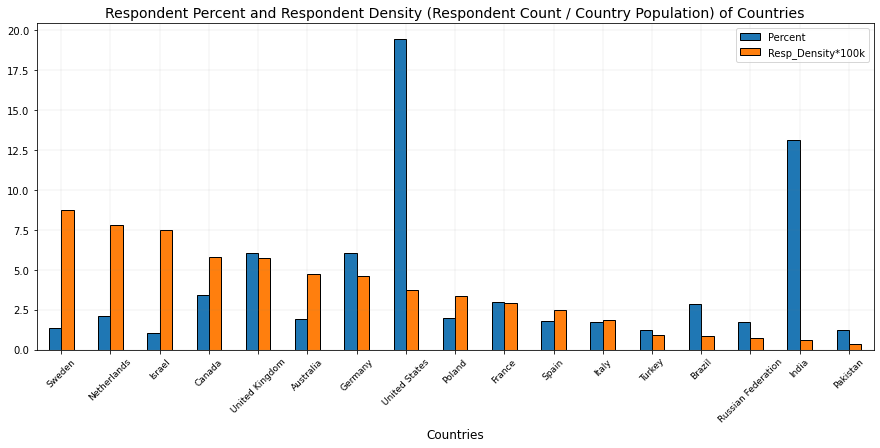

In [247]:
# Visualisation
country_count_filtered.plot.bar("Country",["Percent", "Resp_Density*100k"],figsize=(15,6), edgecolor = "black")
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Respondent Percent and Respondent Density (Respondent Count / Country Population) of Countries", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

* We see from above graph: Although the big portion (19.5 %)of the respondents from the US, <br>
if we compare the respondent densities, it is in the 8th order.<br>
* So, we can say that the people in the US, did not show big interest in survey according to respondent density.<br>
* Most interested top five countries are Sweden, Netherlands, Israel, Canada and UK.<br>
* Least intereste countries are Pakistan and India among the countries having percentage > 1%.<br>

<a id="Q2"></a>
## Q2. What are the most popular (currently being worked and desired to work next year) programing languages in mostly represented countries ?

#### Business Understanding
* As a new starter on learning programing language, Python, i want to undestand the 
 popularity of the languages in different countries.
* I will define the countries which are mostly represented or mostly interested in Survey as the countries having  <br>
percentage > 1% (so they are the countries shown on above graphs).<br>


#### Data Understanding
* For uncovering most popular languages, i will use the columns "LanguageWorkedWith" and "LanguageDesireNextYear"<br>

* I will also create a new data frame containing the columns in which i am interested for further analysis.


In [248]:
# Creating a list to store top country names  
top_country_list = list(country_count[country_count.Percent >1].Country.values)
top_country_list

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Brazil',
 'Netherlands',
 'Poland',
 'Australia',
 'Spain',
 'Italy',
 'Russian Federation',
 'Sweden',
 'Pakistan',
 'Turkey',
 'Israel']

In [249]:
# Creating a feature list
feature_list = ["Age","Age1stCode","ConvertedComp","Country","EdLevel","Employment","Gender",
                "Hobbyist", "UndergradMajor","JobSat","JobSeek","LanguageDesireNextYear", 
                "LanguageWorkedWith", "MainBranch","NEWEdImpt","OrgSize","WorkWeekHrs",
                "YearsCode","YearsCodePro"]

In [250]:
# Create new data frame for top countries containing columns in feature list
top_country_df = df[df.Country.isin(top_country_list)][feature_list]

<a id="Q2.1"></a>
### Q2.1: What is the most popular language among the respondents ?

I will define a function:

In [251]:
def get_language_percent(df, col_country, col_lang, top_country_list ):
    
    '''
    INPUT:
    df - Dataframe
    col_country - Column name in df (as string) where the countries are stored
    col_lang - Language column in df (as string) where the languages are stored
    top_country_list - A list containig country names for which popularity to be calculated
    
    OUTPUT:
    sorted_lang_percent_table:
    Overal Percentages of currently worked languages sorted as descending (as Series)
    country_lang_percent_df:
    Percentages of currently worked languages in Countries (as dataframe)
    lang_list:
    A list containing unique languages
    
    '''
    # create new df
    new_df = df[[col_country,col_lang]]
    
    # dropp na
    new_df.dropna(inplace = True)
    
    # create list for unique languages
    lang_list = []
    for each in list(new_df[col_lang].value_counts().index):
        splited = each.split(";")
        for each in splited:
            lang_list.append(each)
    lang_list = list(set(lang_list))

    # Arranging LanguageWorkedWith by seperating into several columns
    for lang in lang_list:

        new_df[lang] = new_df[col_lang].str.split(";")
        new_df[lang] = [lang in row for row in new_df[lang]]
        new_df[lang] = new_df[lang].astype(int).replace({False: 0, True: 1})
    
    # Percentages of languages 
    sorted_lang_percent_table = new_df.iloc[:,2:].mean().sort_values(ascending = False)
    
    
    # Sorting languages descending and creating new list
    sorted_lang_list = new_df.iloc[:,2:].mean().sort_values(ascending = False).index
    
    # Creating series for language statistics of each country
    # and creating df from those series
    series_list = []

    for country in top_country_list:
        country_lang_percent = new_df[new_df.Country == country].iloc[:,2:].mean().reindex(sorted_lang_list)
        series_list.append(country_lang_percent)

    country_lang_percent_df = pd.concat(series_list, axis = 1)
    country_lang_percent_df.columns = top_country_list
    country_lang_percent_df = country_lang_percent_df.transpose()
    

    return sorted_lang_percent_table, country_lang_percent_df, lang_list

In [252]:
# getting statistics for LanguageWorkedWith using above function
sorted_lang_percent_table, country_lang_percent_df, lang_list = get_language_percent(
    top_country_df, "Country", "LanguageWorkedWith",top_country_list )

In [253]:
sorted_lang_percent_table

JavaScript               0.669996
HTML/CSS                 0.620827
SQL                      0.541550
Python                   0.455911
Java                     0.395374
Bash/Shell/PowerShell    0.354342
C#                       0.307368
TypeScript               0.254056
C++                      0.241974
PHP                      0.236130
C                        0.222419
Go                       0.092839
Kotlin                   0.074543
Ruby                     0.074025
Assembly                 0.061646
Swift                    0.060882
R                        0.058021
VBA                      0.057997
Rust                     0.055777
Objective-C              0.041919
Scala                    0.037826
Dart                     0.034473
Perl                     0.033930
Haskell                  0.022365
Julia                    0.009025
dtype: float64

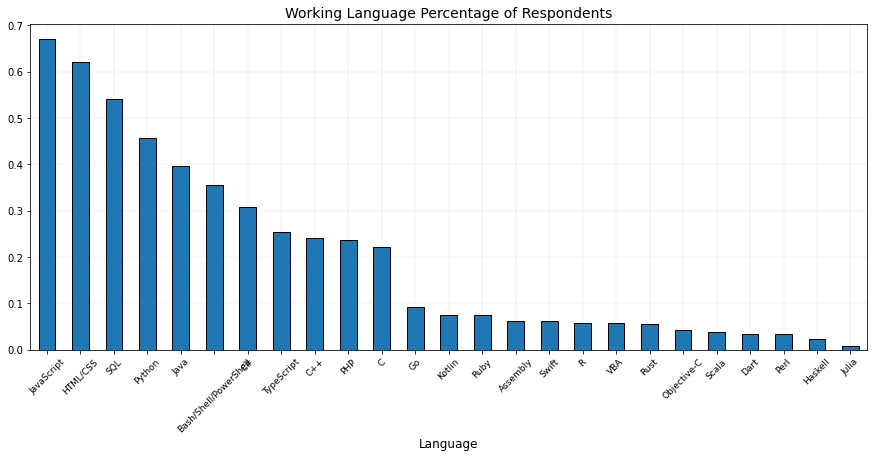

In [254]:
# Visualisation
sorted_lang_percent_table.plot.bar(figsize=(15,6), edgecolor = "black")
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Language", fontsize = 12)
plt.title("Working Language Percentage of Respondents", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

From above graph : 
* Most popular language currently being worked is JavaScript with 67 % of usages among the respondents.
* Followed by HTML/CSS, SQL, Python, Java... 

<a id="Q2.2"></a>
### Q2.2 What are the usage percents of languages in Countries, Which language is being used most in which Country? 

Using the other output of above function:

In [255]:
country_lang_percent_df

,JavaScript,HTML/CSS,SQL,Python,Java,Bash/Shell/PowerShell,C#,TypeScript,C++,PHP,...,Swift,R,VBA,Rust,Objective-C,Scala,Dart,Perl,Haskell,Julia
United States,0.701109,0.638614,0.573627,0.512679,0.354767,0.455944,0.333620,0.264936,0.221611,0.172698,...,0.071349,0.071521,0.063354,0.074701,0.043755,0.043583,0.025617,0.045302,0.025273,0.012722
India,0.646572,0.626961,0.495206,0.387856,0.472400,0.153109,0.191604,0.201482,0.297356,0.276293,...,0.054619,0.042417,0.030941,0.010895,0.048373,0.022225,0.052440,0.018884,0.005665,0.004358
United Kingdom,0.669801,0.616704,0.551438,0.448285,0.296184,0.389104,0.378319,0.252212,0.180586,0.214325,...,0.050885,0.057246,0.067754,0.055586,0.033462,0.036504,0.022400,0.037887,0.034292,0.007467
Germany,0.619048,0.587669,0.493807,0.471236,0.484173,0.404074,0.286815,0.266446,0.267823,0.255712,...,0.062483,0.056427,0.064410,0.083677,0.039086,0.043215,0.034957,0.040187,0.032205,0.010184
Canada,0.702650,0.631011,0.551030,0.496075,0.368499,0.393523,0.357213,0.257115,0.253189,0.229637,...,0.061825,0.052993,0.071639,0.057409,0.037782,0.033366,0.030422,0.031403,0.019136,0.012758
France,0.686195,0.647912,0.552204,0.483179,0.406032,0.411833,0.235499,0.282483,0.284803,0.335847,...,0.058585,0.062645,0.072506,0.087007,0.041183,0.052204,0.027842,0.040023,0.023782,0.006381
Brazil,0.713222,0.652390,0.588454,0.394165,0.419615,0.278088,0.287399,0.264432,0.178771,0.275605,...,0.052142,0.066418,0.066418,0.027312,0.032899,0.027312,0.062073,0.016139,0.015518,0.009932
Netherlands,0.699445,0.661380,0.585250,0.431404,0.379857,0.385408,0.376685,0.305313,0.197462,0.325932,...,0.048374,0.067407,0.047581,0.069786,0.029342,0.051546,0.027756,0.037272,0.039651,0.011895
Poland,0.605331,0.535684,0.485813,0.437661,0.385211,0.369733,0.302666,0.286328,0.279450,0.200344,...,0.038693,0.041273,0.056750,0.064488,0.033534,0.061909,0.033534,0.024076,0.028375,0.012038
Australia,0.712378,0.650045,0.563669,0.466607,0.304541,0.414960,0.357970,0.318789,0.191451,0.228851,...,0.092609,0.066785,0.075690,0.067676,0.055209,0.028495,0.025824,0.041852,0.030276,0.006233


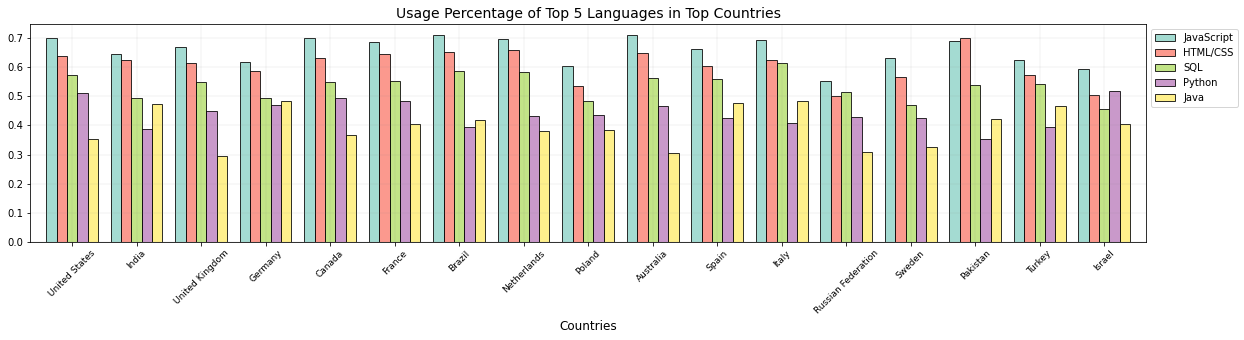

In [256]:
# Visualisation

# Filtering as to get top 5 language for each country
country_lang_percent_df.iloc[:,:5].plot.bar(figsize = (20,4), 
                                            width = 0.8, 
                                            colormap= "Set3", 
                                            edgecolor = "black", 
                                            alpha = 0.8)

# Ploting
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Usage Percentage of Top 5 Languages in Top Countries", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

* Overal top 5 language are JavaScript, HTML, SQL, Python and Java from previous graph.
* Still almost in all countries JavaScript at the first rank except Pakistan; in Pakistan HTML/CSS has greater usage than JavaScript.
* Altough Python is at 4th rank, it is at 2nd rank in Israel and at 4th rank some other countries.
* HTML/CSS is mostly used in Pakistan,<br>
    SQL is mostly used in Italy,<br>
    Python is mostly used in Israel and US,<br>
    Java is mostly used in Italy and Germany among the other countries.

<a id="Q2.3"></a>
### Q2.3: What is the most desired language next year ? 

In [257]:
# getting statistics for LanguageDesireNextYear using same function
sorted_desired_lang_percent_table, country_desired_lang_percent_df, lang_list = get_language_percent(
    top_country_df, "Country", "LanguageDesireNextYear",top_country_list )

In [258]:
sorted_desired_lang_percent_table

Python                   0.495917
JavaScript               0.473173
HTML/CSS                 0.376649
SQL                      0.362123
TypeScript               0.313547
C#                       0.248168
Go                       0.236338
Java                     0.235605
Bash/Shell/PowerShell    0.228539
Rust                     0.209720
C++                      0.180747
Kotlin                   0.170200
C                        0.115185
PHP                      0.113144
Swift                    0.103329
R                        0.079512
Dart                     0.076712
Ruby                     0.075063
Scala                    0.066112
Haskell                  0.057763
Assembly                 0.044807
Julia                    0.031826
Objective-C              0.026199
Perl                     0.020441
VBA                      0.016986
dtype: float64

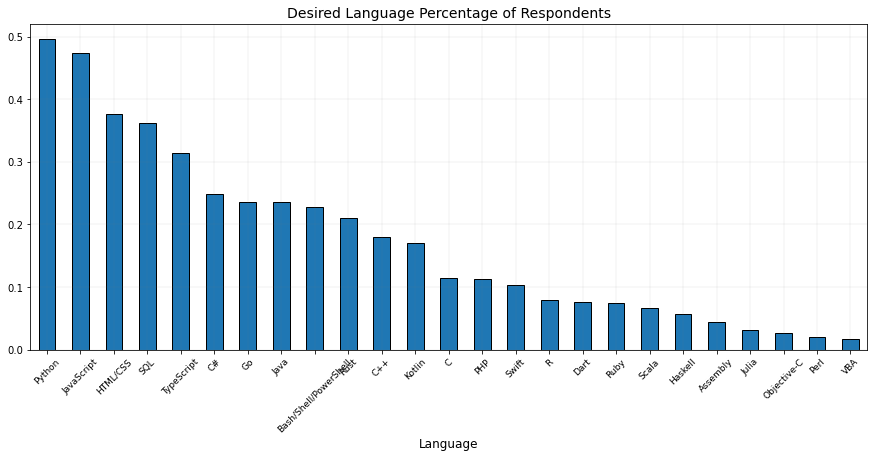

In [259]:
# Visualisation
sorted_desired_lang_percent_table.plot.bar(figsize=(15,6), edgecolor = "black")
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Language", fontsize = 12)
plt.title("Desired Language Percentage of Respondents", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

* Most desired language is Python with 49.5% desire among the respondents.
* Followed by JavaScript, HTML/CSS, SQL and TypeScript.
* So, Bash/Shell/PowerShell and Java seems to be losing popularity.
* TypeScript seems to be getting more popular.

<a id="Q2.4"></a>
### Q2.4 What are the desired percents of languages in Countries, Which language is desired most in which country?

In [260]:
country_desired_lang_percent_df

,Python,JavaScript,HTML/CSS,SQL,TypeScript,C#,Go,Java,Bash/Shell/PowerShell,Rust,...,R,Dart,Ruby,Scala,Haskell,Assembly,Julia,Objective-C,Perl,VBA
United States,0.503810,0.480029,0.393536,0.394821,0.325131,0.281976,0.251400,0.198237,0.288495,0.262969,...,0.085851,0.049858,0.090993,0.065100,0.067579,0.049949,0.038564,0.028372,0.023781,0.019098
India,0.581471,0.503724,0.343731,0.334575,0.272812,0.135164,0.239448,0.312228,0.114991,0.102266,...,0.117008,0.130664,0.081316,0.074488,0.031037,0.035537,0.033520,0.041899,0.025916,0.018312
United Kingdom,0.437184,0.447579,0.382239,0.343332,0.314523,0.321651,0.231066,0.179091,0.247104,0.220077,...,0.072468,0.045144,0.066231,0.059400,0.060588,0.040986,0.027324,0.019899,0.021384,0.017523
Germany,0.440081,0.401964,0.377707,0.336125,0.308114,0.237655,0.219174,0.267109,0.270286,0.247473,...,0.053133,0.060352,0.050823,0.053133,0.062951,0.047935,0.029165,0.016171,0.018481,0.015593
Canada,0.509177,0.483482,0.374934,0.351337,0.341898,0.288936,0.251180,0.195071,0.243314,0.238070,...,0.057158,0.057682,0.090718,0.065024,0.055060,0.056109,0.029890,0.025695,0.017829,0.015207
France,0.480291,0.451789,0.379018,0.337780,0.322620,0.182535,0.221953,0.215282,0.249848,0.258945,...,0.064281,0.064281,0.053972,0.068526,0.064888,0.053972,0.027289,0.010309,0.018799,0.015161
Brazil,0.526079,0.600129,0.455892,0.431423,0.345782,0.233097,0.240824,0.250483,0.204121,0.159047,...,0.090792,0.183516,0.101095,0.061172,0.049581,0.040567,0.034127,0.017386,0.009659,0.018674
Netherlands,0.419032,0.457429,0.408180,0.380634,0.362270,0.314691,0.213689,0.224541,0.251252,0.216194,...,0.062604,0.048414,0.051753,0.060100,0.067613,0.045910,0.035058,0.016694,0.010017,0.010017
Poland,0.446809,0.428191,0.336879,0.351064,0.343972,0.245567,0.186170,0.253546,0.237589,0.210106,...,0.044326,0.058511,0.054965,0.083333,0.078014,0.050532,0.023050,0.010638,0.012411,0.008865
Australia,0.464217,0.472921,0.420696,0.366538,0.358801,0.293037,0.232108,0.168279,0.241779,0.241779,...,0.080271,0.056093,0.078337,0.044487,0.085106,0.033849,0.024178,0.031915,0.016441,0.022244


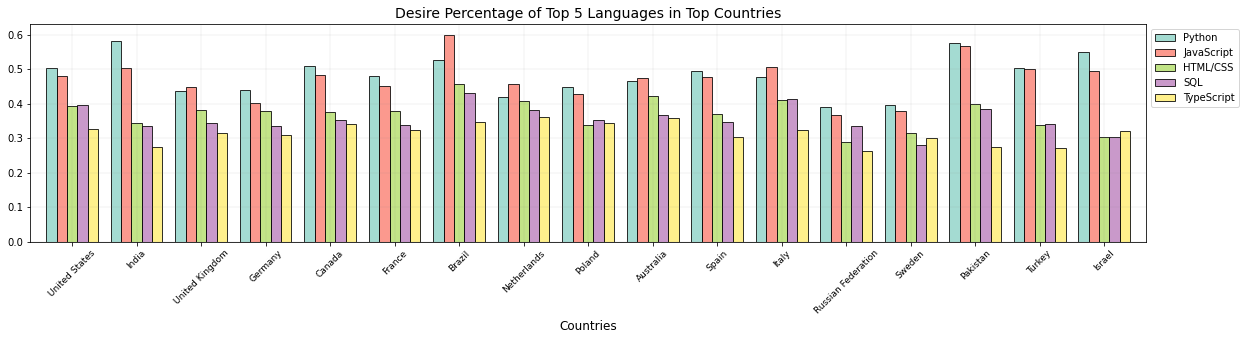

In [261]:
# Visualisation
country_desired_lang_percent_df.iloc[:,:5].plot.bar(
    figsize = (20,4), 
    width = 0.8, 
    colormap= "Set3", 
    edgecolor = "black", 
    alpha = 0.8)

# Plotting
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Desire Percentage of Top 5 Languages in Top Countries", fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

* Python is mostly desired in Pakistan, India and Israel,
* JavaScript is mostly desired Brazil and Pakistan,
* HTML/CSS is mostly desired in Brazil, 
* SQL is mostly desired in Brazil, Italy and US,
* TypeScript is mostly desired in Netherlands.

<a id="Q3"></a>
## Q3: How is the distribution of following features in those countries ? (Primary field of study, Education Level, Job satisfaction, Employment and Job seeking status, Education importance)


### Business Understanding:
More importantly, as a new programmer, i want to understand how well satisfied the programmer are.<br>
And also in general, i wonder other features how effects the satisfaction.

### Data Understanding

### Exploratory Data Analysis

In [262]:
# Arranging, cleaning columns 

# EdLevel column, splitting unnecessary parts from column
top_country_df["EdLevel"] = top_country_df.EdLevel.str.split("\(", expand=True)[0]

# Employment column
top_country_df.Employment = top_country_df.Employment.str.split(", f", expand = True)[0]

# UndergradMajor column
top_country_df.UndergradMajor = top_country_df.UndergradMajor.str.split("\,|\(", expand = True)[0]

# Arranging OrgSize column
top_country_df.OrgSize = top_country_df.OrgSize.str.split("em|er", expand = True)[0]

# Dropping NaN in "LanguageDesireNextYear" and "LanguageWorkedWith"
top_country_df.dropna(subset = ["LanguageDesireNextYear","LanguageWorkedWith"], inplace = True)

# Dropping Gender column
top_country_df.drop("Gender", axis = 1, inplace = True)

In [263]:
# Arranging Age1stCode column:
# Values "Younger than 5 years"  in column to be replaced with 4.
# Data type to be changed from object to int
# Nan values to be filled with mean of the column

# Replace "Younger than 5 years" with 4.
top_country_df.Age1stCode = [4 if each == "Younger than 5 years" else each for each in top_country_df.Age1stCode]


# Fill na values with mean:

# Calculate the mean 
Age1stCode_sum = sum([int(each) for each in top_country_df.Age1stCode.dropna(inplace = False)])
Age1stCode_len = len([int(each) for each in top_country_df.Age1stCode.dropna(inplace = False)])
Age1stCode_mean = Age1stCode_sum / Age1stCode_len

# Fill na with mean
top_country_df.Age1stCode = top_country_df.Age1stCode.fillna(Age1stCode_mean)

# Change data type to int
top_country_df.Age1stCode = top_country_df.Age1stCode.astype(int)

In [264]:
# Arranging YearsCode column:
# "Less than 1 year" to be replaced with 0.5
# "More than 50 years" to be replaced with 51
# Data type to be changed from object to float
# Nan values to be filled with mean of the column

# Replacing "Less than 1 year" --> 0.5  and "More than 50 years" --> 51
top_country_df.YearsCode = [0.5 if each == "Less than 1 year" else  
                            51 if each == "More than 50 years" else 
                            each for each in top_country_df.YearsCode]

# Fill na values with mean:

# Calculate the mean 
YearsCode_sum = sum([float(each) for each in top_country_df.YearsCode.dropna(inplace = False)])
YearsCode_len = len([float(each) for each in top_country_df.YearsCode.dropna(inplace = False)])
YearsCode_mean = YearsCode_sum / YearsCode_len

# Fill na with mean
top_country_df.YearsCode = top_country_df.YearsCode.fillna(YearsCode_mean)

# Change data type to float
top_country_df.YearsCode = top_country_df.YearsCode.astype(float)

In [265]:
# Arranging YearsCodePro column:
# Less than 1 year  --> 0.5
# More than 50 years --> 51
# Data type to be changed from object to float
# Nan values to be filled with mean of the column

# Replacing
top_country_df.YearsCodePro = [0.5 if each == "Less than 1 year" else  
                               51 if each == "More than 50 years" else 
                               each for each in top_country_df.YearsCodePro]

# Fill na values with mean:

# Calculate the mean 
YearsCodePro_sum = sum([float(each) for each in top_country_df.YearsCodePro.dropna(inplace = False)])
YearsCodePro_len = len([float(each) for each in top_country_df.YearsCodePro.dropna(inplace = False)])
YearsCodePro_mean = YearsCodePro_sum / YearsCodePro_len

# Fill na with mean
top_country_df.YearsCodePro = top_country_df.YearsCodePro.fillna(YearsCodePro_mean)

# Change data type to float
top_country_df.YearsCodePro = top_country_df.YearsCodePro.astype(float)

In [266]:
# Column WorkWeekHrs and Age
# Filling nan with mean

top_country_df.WorkWeekHrs = top_country_df.WorkWeekHrs.fillna(top_country_df.WorkWeekHrs.mean())
top_country_df.Age = top_country_df.Age.fillna(top_country_df.Age.mean())

In [267]:
# Filling nan values with median in categorical features:

for each in ["MainBranch","Employment","EdLevel","JobSeek","UndergradMajor","NEWEdImpt","JobSat","OrgSize"]:
    top_country_df[each].fillna(top_country_df[each].value_counts().index[0], inplace=True)

In [268]:
# Checking the notnull percentage of columns:

top_country_df.notnull().mean().sort_values(ascending = False)

YearsCodePro              1.000000
YearsCode                 1.000000
Age1stCode                1.000000
Country                   1.000000
EdLevel                   1.000000
Employment                1.000000
Hobbyist                  1.000000
UndergradMajor            1.000000
JobSat                    1.000000
JobSeek                   1.000000
LanguageDesireNextYear    1.000000
LanguageWorkedWith        1.000000
MainBranch                1.000000
NEWEdImpt                 1.000000
OrgSize                   1.000000
WorkWeekHrs               1.000000
Age                       1.000000
ConvertedComp             0.611165
dtype: float64

* So, i filled all the nan except ConvertedComp feature.
* Almost 40 % of data in ConvertedComp is missing; i will drop the nans in this column later,
  after i complete the analysis in this section.
* I do not want to loose data in other features by dropping it now.

In [269]:
# Cleaning LanguageDesireNextYear:

# Creating new categorical columns for each Language
for lang in lang_list:
    top_country_df[lang] = top_country_df["LanguageDesireNextYear"].str.split(";") # split each language
    top_country_df[lang] = [lang in row for row in top_country_df[lang]]           # True-False
    top_country_df[lang] = top_country_df[lang].replace({False: 0, True: 1}).astype(int) # Change to 1 and 0
    top_country_df.rename(columns={lang: "Desired_{}".format(lang)}, inplace = True)    # Change type

# Deleting original column
top_country_df.drop(["LanguageDesireNextYear"], axis = 1, inplace = True)

In [270]:
# Cleaning "LanguageWorkedWith":

# Creating new categorical columns for each Language
for lang in lang_list:
    top_country_df[lang] = top_country_df["LanguageWorkedWith"].str.split(";")
    top_country_df[lang] = [lang in row for row in top_country_df[lang]]
    top_country_df[lang] = top_country_df[lang].replace({False: 0, True: 1}).astype(int)
    top_country_df.rename(columns={lang: "Worked_{}".format(lang)}, inplace = True)

# Deleting original column
top_country_df.drop(["LanguageWorkedWith"], axis = 1, inplace = True)


In [271]:
# Check the data
top_country_df.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,Hobbyist,UndergradMajor,JobSat,JobSeek,...,Worked_Objective-C,Worked_SQL,Worked_PHP,Worked_Ruby,Worked_JavaScript,Worked_Python,Worked_Go,Worked_C#,Worked_TypeScript,Worked_C++
0,31.140851,13,NaN,Germany,Master’s degree,Independent contractor,Yes,Computer science,Slightly satisfied,I am not interested in new job opportunities,...,0,0,0,0,1,0,0,1,0,0
1,31.140851,19,NaN,United Kingdom,Bachelor’s degree,Employed full-time,No,Computer science,Very dissatisfied,I am not interested in new job opportunities,...,0,0,0,0,1,0,0,0,0,0
2,31.140851,15,NaN,Russian Federation,Bachelor’s degree,Employed full-time,Yes,Computer science,Very satisfied,"I’m not actively looking, but I am open to new...",...,1,0,0,0,0,1,0,0,0,0
4,31.000000,16,NaN,United States,Bachelor’s degree,Employed full-time,Yes,Computer science,Very satisfied,"I’m not actively looking, but I am open to new...",...,0,1,0,1,0,0,0,0,0,0
5,31.140851,14,NaN,Germany,Secondary school,Employed full-time,No,Computer science,Slightly satisfied,I am not interested in new job opportunities,...,0,0,0,0,1,0,0,0,0,0


<a id="Q3.1"></a>
### Q3.1 How is the distribution of the primary fields in top countries?

* I will define a function in order to calculate the percentages of feature pairs in data frame

In [272]:
def get_pair_statistics(top_country_df, in_col_pair1, col_pair2, top_country_list):
    
    '''
    INPUTS:
    top_country_df - Dataframe in which the features to be investigated (as dataframe)
    in_col_pair1 - Name of the column in which data to be grouped (as string)
    col_pair2 - Name of the column which will be investigated in grouped data (as string)
    top_country_list - country list in order the reindex the data (as list)
    
    OUTPUTS:
    percents_df - Percentage table of col_pair2 in in_col_pair1 (as dataframe)
    ovrl_percents_df - Percentage table of col_pair2 in overall sum of col_pair2 for each in_col_pair1 (as dataframe)
    
    '''
    
    # Create gropued df
    grouped_df = top_country_df.groupby([in_col_pair1])[col_pair2]
    
    # Creating new df from groups in grouped df
    pair1_list = []
    series_list = []
    for a,b in grouped_df:
        pair1_list.append(a)
        series_list.append(b.value_counts())
    
    # Creating new df with series
    percents_df = pd.concat(series_list, axis = 1)

    # Updating column names
    percents_df.columns = pair1_list   
    
    # Copying new_df for relative percentage
    ovrl_percents_df = percents_df.copy()

    # Getting percentages
    for col in percents_df.columns:
        percents_df[col] = percents_df[col].map(lambda x:x/(percents_df[col].sum())*100)
    
    # Getting relative percentages
    ovrl_percents_df = ovrl_percents_df.div(ovrl_percents_df.sum(axis = 1), axis = 0)*100

    # Switching columns and rows in both dfs
    percents_df = percents_df.transpose()
    ovrl_percents_df = ovrl_percents_df.transpose()

    # Reindex both dfs according to top_country_list
    percents_df = percents_df.reindex(top_country_list)
    ovrl_percents_df = ovrl_percents_df.reindex(top_country_list)
    
    return percents_df, ovrl_percents_df

In [273]:
undergradMajor_percent_in_countries_df, undergradMajor_ovrl_percent_in_countries_df = get_pair_statistics(
    top_country_df, "Country", "UndergradMajor", top_country_list)

In [274]:
undergradMajor_percent_in_countries_df

,Computer science,Information systems,Another engineering discipline,A natural science,Web development or web design,Mathematics or statistics,A humanities discipline,A business discipline,Fine arts or performing arts,A social science,A health science,I never declared a major
United States,61.766334,5.869324,6.856774,4.752676,1.910299,3.940568,3.525286,3.294574,2.851606,3.488372,0.406054,1.338132
India,76.521466,5.928605,11.401164,0.754836,3.176600,0.849190,0.141532,0.676207,0.078629,0.094354,0.125806,0.251612
United Kingdom,61.747168,3.548002,7.066190,8.199165,2.325581,6.350626,2.832439,1.729278,2.176506,2.236136,0.506857,1.282051
Germany,73.088065,4.634994,6.517961,5.214368,1.303592,3.765933,1.013905,1.738123,0.579374,1.071842,0.347625,0.724218
Canada,70.752236,4.892162,6.102052,4.313519,3.419253,3.261441,1.420305,1.893740,0.946870,1.630721,0.631247,0.736454
France,69.763206,4.250152,6.557377,3.642987,5.950213,3.703704,1.153613,1.639344,1.517911,0.728597,0.485732,0.607165
Brazil,64.243997,15.704088,7.657365,1.492537,4.477612,1.362751,0.713822,2.141467,0.843608,0.973394,0.324465,0.064893
Netherlands,67.252931,4.355109,6.532663,4.941374,4.773869,3.015075,1.675042,3.182580,1.423786,1.340034,0.837521,0.670017
Poland,73.107747,3.739982,12.021371,2.671416,0.712378,2.493321,1.869991,1.780944,0.178094,0.801425,0.089047,0.534283
Australia,64.202335,11.381323,6.712062,4.669261,2.529183,2.529183,2.431907,2.334630,1.653696,0.680934,0.486381,0.389105


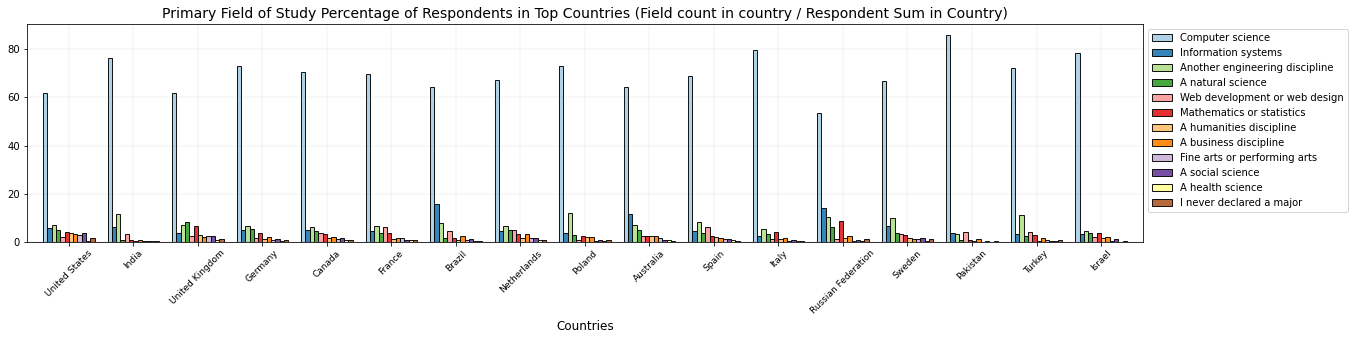

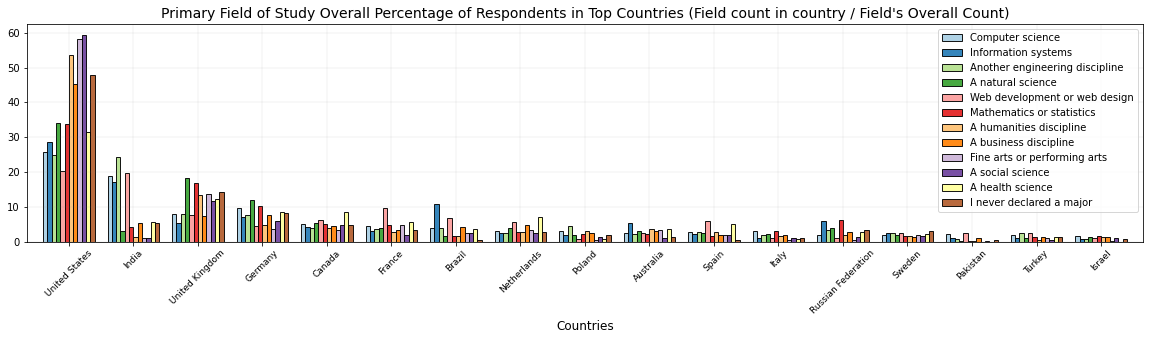

In [275]:
# Visualisation of undergradMajor_percent_in_countries_df
undergradMajor_percent_in_countries_df.plot.bar(
    figsize = (20,4),
    width = 0.8, 
    colormap= "Paired", 
    edgecolor = "black", 
    alpha = 0.9)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title(
    "Primary Field of Study Percentage of Respondents in Top Countries (Field count in country / Respondent Sum in Country)", 
    fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

# Visualisation of undergradMajor_ovrl_percent_in_countries_df
undergradMajor_ovrl_percent_in_countries_df.plot.bar(
    figsize = (20,4), 
    width = 0.8, 
    colormap= "Paired", 
    edgecolor = "black", 
    alpha = 0.9)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title(
    "Primary Field of Study Overall Percentage of Respondents in Top Countries (Field count in country / Field's Overall Count)", 
    fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

* Primary field of the respondents is Computer Science in all countries; roughly min 60% of respondent's primary field is computer science in each country. 
* From 2nd graph we can see that big portion of the computer science and information system employees, as well as fine arts and humanities dicipline, are in US.
* In india, respondents are mostly from other engineering diciplines.

<a id="Q3.2"></a>
### Q3.2 How is the distribution of the education level in top countries?

In [276]:
EdLevel_percent_in_countries_df, EdLevel_ovrl_percent_in_countries_df = get_pair_statistics(
    top_country_df, "Country", "EdLevel", top_country_list)

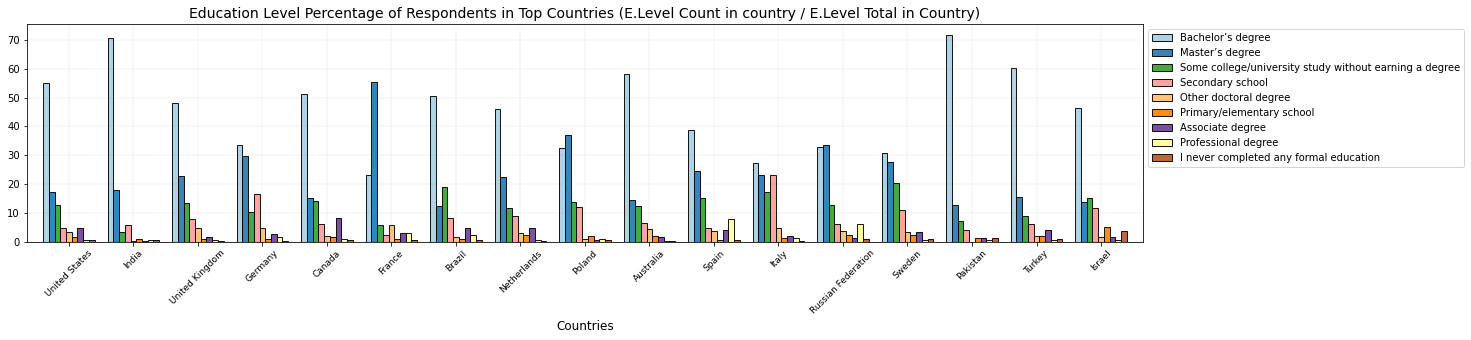

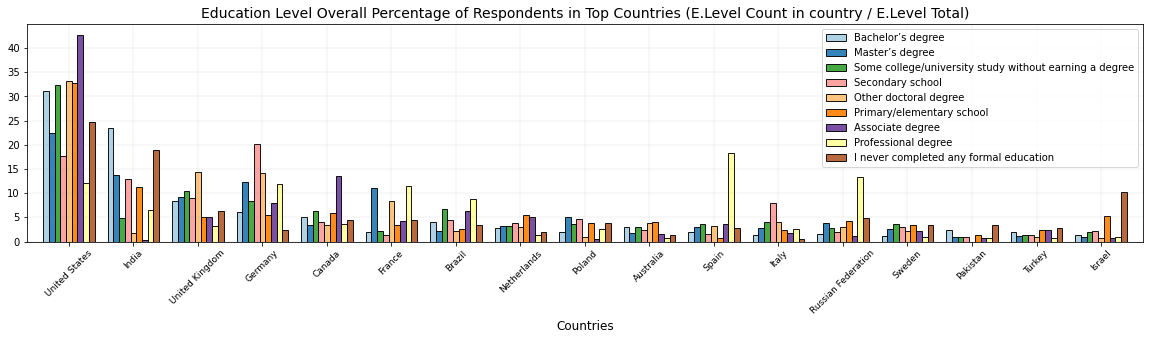

In [277]:
# Visualisation of EdLevel_percent_in_countries_df
EdLevel_percent_in_countries_df.plot.bar(
    figsize = (20,4), 
    width = 0.8, 
    colormap= "Paired", 
    edgecolor = "black", 
    alpha = 0.9)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Education Level Percentage of Respondents in Top Countries (E.Level Count in country / E.Level Total in Country)", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

# Visualisation EdLevel_ovrl_percent_in_countries_df
EdLevel_ovrl_percent_in_countries_df.plot.bar(
    figsize = (20,4), 
    width = 0.8, 
    colormap= "Paired", 
    edgecolor = "black", 
    alpha = 0.9)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Education Level Overall Percentage of Respondents in Top Countries (E.Level Count in country / E.Level Total)", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

* At least 70 % of the respondents in India and Pakistan have Bachelor's degree; which is the highest among the other countries.
* However in overall, US has the big portion of Bachelor's Degrees than India, roughly 30 percent of Bachelor's Degree is in US and 23% is in India.
* US has the big portion of respondents (50%) having master's degree,Canada at 2nd rank with 13%.
* Spain has th big portion of repondents (18%) having professioal degree, Russia at 2nd rank with 13%.

<a id="Q3.3"></a>
### Q3.3 How is the distribution of the job satisfaction in top countries?

In [278]:
JobSat_percent_in_countries_df, JobSat_ovrl_percent_in_countries_df = get_pair_statistics(
    top_country_df, "Country", "JobSat", top_country_list)

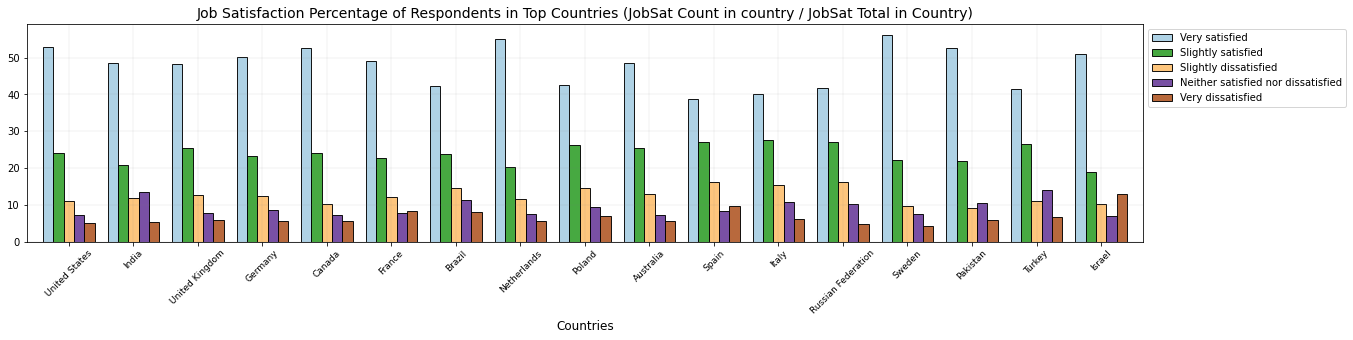

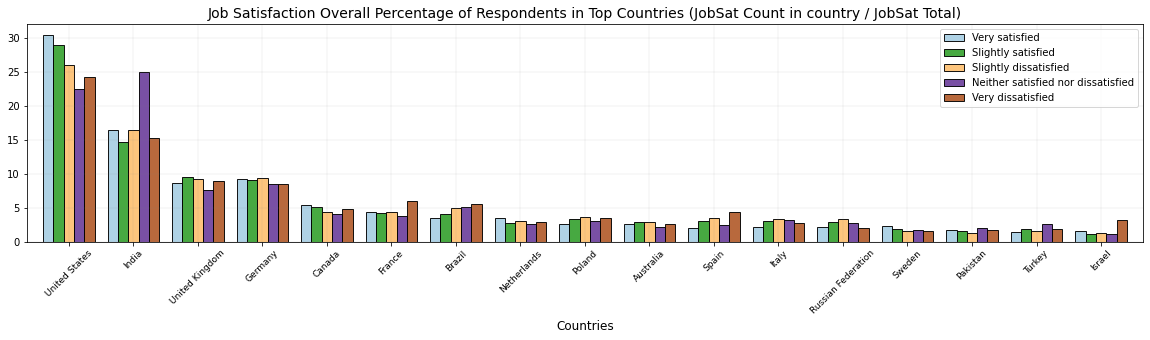

In [279]:
# Visualisation of JobSat_percent_in_countries_df
JobSat_percent_in_countries_df.plot.bar(
    figsize = (20,4), 
    width = 0.8, 
    colormap= "Paired", 
    edgecolor = "black", 
    alpha = 0.9)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Job Satisfaction Percentage of Respondents in Top Countries (JobSat Count in country / JobSat Total in Country)", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

# Visualisation of JobSat_ovrl_percent_in_countries_df
JobSat_ovrl_percent_in_countries_df.plot.bar(
    figsize = (20,4), 
    width = 0.8, 
    colormap= "Paired", 
    edgecolor = "black", 
    alpha = 0.9)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Job Satisfaction Overall Percentage of Respondents in Top Countries (JobSat Count in country / JobSat Total)", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

In [280]:
Empl_percent_in_countries_df, Empl_ovrl_percent_in_countries_df = get_pair_statistics(
    top_country_df, "Country", "Employment", top_country_list)

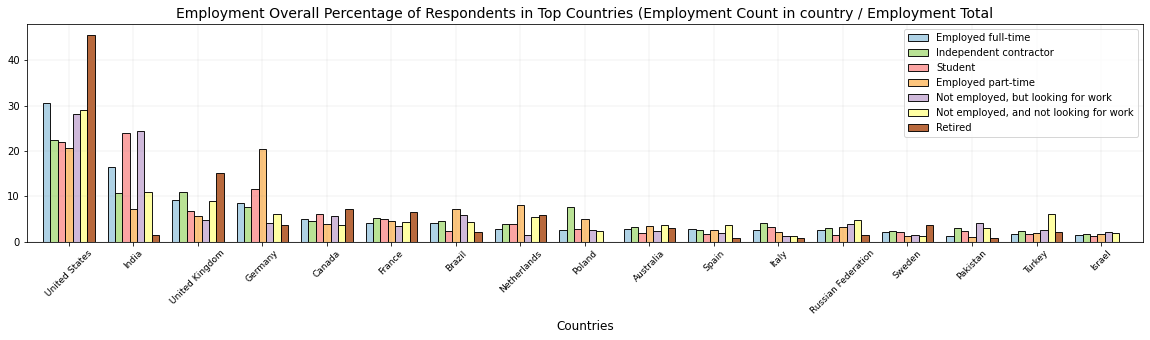

In [281]:
# Visualisation of Empl_ovrl_percent_in_countries_df
Empl_ovrl_percent_in_countries_df.plot.bar(
    figsize = (20,4), 
    width = 0.8, 
    colormap= "Paired", 
    edgecolor = "black", 
    alpha = 0.9)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("Employment Overall Percentage of Respondents in Top Countries (Employment Count in country / Employment Total", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

In [282]:
JobSeek_percent_in_countries_df, JobSeek_ovrl_percent_in_countries_df = get_pair_statistics(
    top_country_df, "Country", "JobSeek", top_country_list)

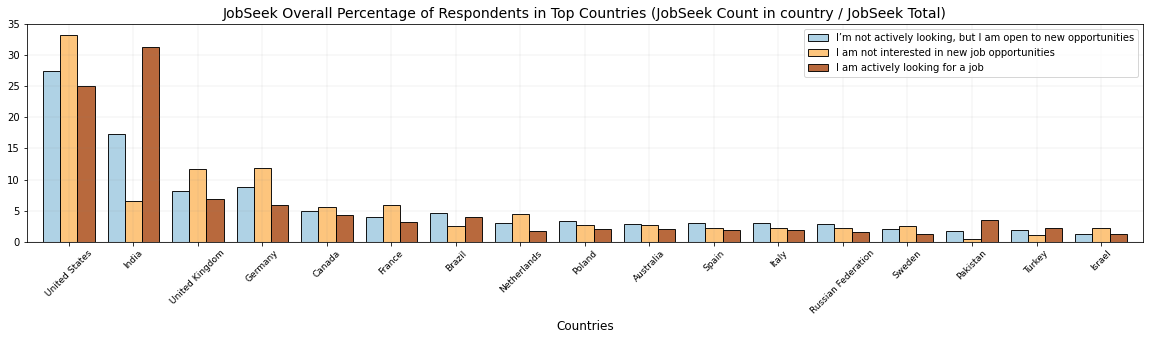

In [283]:
# Visualisation of JobSeek_ovrl_percent_in_countries_df
JobSeek_ovrl_percent_in_countries_df.plot.bar(
    figsize = (20,4), width = 0.8, colormap= "Paired", edgecolor = "black", alpha = 0.9)

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation = 45, fontsize = 9)
plt.xlabel("Countries", fontsize = 12)
plt.title("JobSeek Overall Percentage of Respondents in Top Countries (JobSeek Count in country / JobSeek Total)", 
          fontsize = 14)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.show()

<a id="Q4"></a>
## Q4: What are the most effective features on job satisfaction?

* I will use Sklearn library to create a Logistic Regression model.
* Using model coefficients, features that has negative and positive effect on job satisfaction to be calculated.
* Before creting model, i will prepare the data.

In [284]:
# Creating list for numerical and categorical variables
numericals = ["Age","Age1stCode","ConvertedComp","WorkWeekHrs","YearsCode","YearsCodePro"]
categoricals = ["Country","EdLevel","Employment","Hobbyist","UndergradMajor","JobSeek",
                "MainBranch","NEWEdImpt","OrgSize"]

In [285]:
# Checking JobSat column:

top_country_df.JobSat.value_counts()

Very satisfied                        18757
Slightly satisfied                     8962
Slightly dissatisfied                  4588
Neither satisfied nor dissatisfied     3438
Very dissatisfied                      2230
Name: JobSat, dtype: int64

In [286]:
# Arranging JobSat column:
# I will accept "Very satisfied" and "Slightly satisfied" as "Satisfied"
# I will accept "Very dissatisfied" and "Slightly dissatisfied" as "Disatisfied"
# I will delete the rows having "Neither satisfied nor dissatisfied"
# Convert categorical variable "Satisfied" as 1 and "Dissatisfied" as 0.

# Delete rows "Neither satisfied nor dissatisfied" and create new dataframe
df = top_country_df.drop(top_country_df[top_country_df.JobSat == "Neither satisfied nor dissatisfied"].index)


# Replace "Very satisfied" and "Slightly satisfied" as "Satisfied"
# Replace "Very dissatisfied" and "Slightly dissatisfied" as "Disatisfied"
# Convert to categorical variable: "Satisfied" as 1 and "Dissatisfied" as 0.
df.JobSat = [1 if each == "Very satisfied" else 
             1 if each == "Slightly satisfied" else 
             0 if each == "Very dissatisfied"else 
             0 if each == "Slightly dissatisfied" else
             each for each in df.JobSat]


In [287]:
# Droppind nan in ConvertedComp:

df = df.dropna()

In [288]:
# One hot encoding categorical variables
df = pd.get_dummies(df,  columns = categoricals )

In [289]:
# Normalization of numerical variables
for each in numericals:
    df[each] = (df[each] - df[each].min()) / (df[each].max() - df[each].min())

In [290]:
# LOGISTIC REGRESSION MODEL

# Split data into X and y
X = df.drop("JobSat", axis = 1)
y = df.JobSat

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Define the model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# get importance (effects of each feature or variable on JobSat)
importance = model.coef_[0]

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.65%


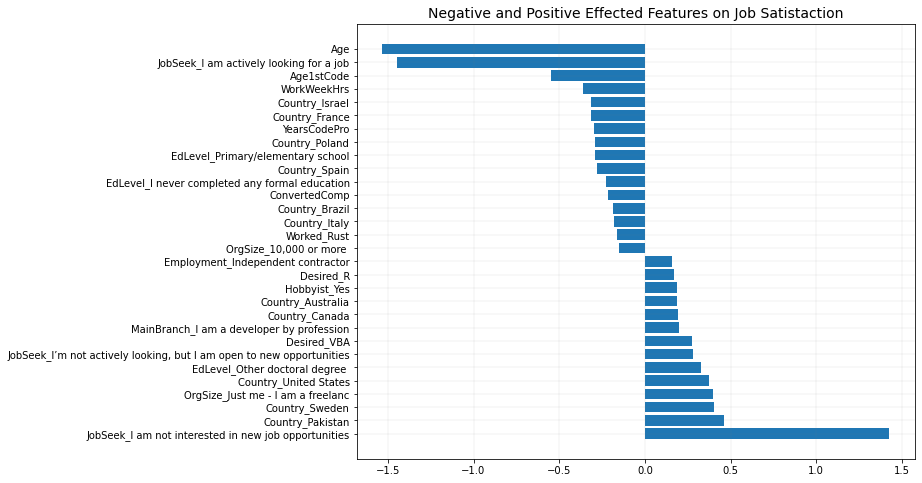

In [291]:
# Create dataframe for feature importance results
results_df = pd.DataFrame()
results_df["Rates"] = importance.tolist()
results_df["Columns"] = X.columns

# Reindex dataframe and sort and filter
new_index = results_df.Rates.sort_values(ascending = False).index
sorted_results = results_df.reindex(new_index)
filtered_results = sorted_results[np.abs(sorted_results.Rates) > 0.15]

# Visualisation
plt.figure(figsize =(10,8))
plt.barh(filtered_results.Columns, filtered_results.Rates)
plt.grid(axis="both", color="gray", linewidth=0.1)
plt.title("Negative and Positive Effected Features on Job Satistaction",fontsize = 14)
plt.show()


* Features having effect rate > abs(0.15) are shown.
* According to graph:
* Top 3 features negatively effecting Job Satisfaction are age, actively looking for a job and age of startin to coding. So, in the elderly ages job satisfaction may decrease because of the personal expectation increases. As expected, respondents who are looking for a job would be dissatisfied. Respondents who started in early ages may be dissatisfied beacuse of they are well-qualified in their profession but the company they work may not be well-qualified comparing with their expectations. In the same way, as the professional coding years increase, satisfaction may decrease. Also increased working hours decreases satisfaction.
* Among the countries; most dissatisfied countries are Israel, France, Poland, Spain, Brazil and Italy.
* Primary-Elementary shcool graduations most dissatisfied, whereas having doctoral degrees mostly satisfied.
* Most satisfied countries Pakistan, Sweden, US, Canada and Australia.


<a id="5"></a>
## Conclusion

Having the top respondent density and greater positive effect ratio on satisfaction, Sweden seems to have the most satisfied developers.<br>

Although Pakistan has the greatest positive effect ratio on job satisfaction; because it has lowest respondent density, i can not conclude that it has the satisfied developers.<br>

We can conclude that most dissatisfied developers are from Israel, due to it’s respondent density is higher and it has top negative effect ration among the countries.<br>

As programing languages, Python and TypeScript have increasing popularity, however JavaScript is still mostly used language.